## Evaluación Final Módulo 3 

**Fase 1: Exploración y Limpieza**

1. Exploración Inicial:

Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.


Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

Une los dos conjuntos de datos de la forma más eficiente.


In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar los distintos test
# ------------------------------------------------------------------------------
from scipy import stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway, shapiro, kstest
from sklearn.linear_model import LinearRegression

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importamos los csv para poder visualizar los datos
df1 = pd.read_csv('Customer Flight Activity.csv')
df2= pd.read_csv('Customer Loyalty History.csv')

**Comenzamos la exploración de los dataframes**

In [3]:
print("Analizamos las columnas del dataframe Customer Flight Activity")
df1.head()

Analizamos las columnas del dataframe Customer Flight Activity


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
print(f"El dataframe de 'Activity' tiene esta dimensión: {df1.shape}")

El dataframe de 'Activity' tiene esta dimensión: (405624, 10)


In [5]:
print("Analizamos las columnas del dataframe Customer Loyalty History")
df2.head()

Analizamos las columnas del dataframe Customer Loyalty History


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [6]:
print(f"El dataframe contiene {df2.shape[0]} filas y {df2.shape[1]} columnas")

El dataframe contiene 16737 filas y 16 columnas


In [7]:
# Vemos el tipo de dato
print(df1.dtypes)

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [9]:
# Analizamos las columnas numéricas del df 'Activity'
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [10]:
# Ahora hacemos los mismo con las categóricas
df1.describe(include = "object").T #Todas las variables de este df son numéricas

ValueError: No objects to concatenate

In [11]:
# Vemos el tipo de dato del df 'Loyalty'
print(df2.dtypes)

Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [13]:
# Analizamos las columnas numéricas del df 'Loyalty'
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [14]:
# Ahora hacemos los mismo con las categóricas
df2.describe(include = "object").T 

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


**Duplicados**

In [15]:
# Vemos los duplicados
print(f' El df de Activity tiene: {df1.duplicated().sum()} filas duplicadas')

 El df de Activity tiene: 1864 filas duplicadas


In [16]:
print('El def de Loyalty tiene:')
df2.duplicated().sum()

El def de Loyalty tiene:


0

**Nulos**

In [17]:
# Analizamos los valores nulos
print("Valores nulos en el dataframe 'Customer Flight Activity':")
df1.isnull().sum()

Valores nulos en el dataframe 'Customer Flight Activity':


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

Vemos que no hay valores nulos en este df

In [18]:
print("Valores nulos en el dataframe 'Customer Loyalty History':")
df2.isnull().sum()

Valores nulos en el dataframe 'Customer Loyalty History':


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [19]:
# Veamos el porcentaje de esos nulos en un dataframe
df_nulos = pd.DataFrame(df2.isnull().sum() / df2.shape[0] * 100, columns = ["%_nulos"])
df_nulos

,%_nulos
Loyalty Number,0.000000
Country,0.000000
Province,0.000000
City,0.000000
Postal Code,0.000000
Gender,0.000000
Education,0.000000
Salary,25.321145
Marital Status,0.000000
Loyalty Card,0.000000


Hasta aquí hemos visto que:

  El dataframe de **Activity** tiene: 
  
  -  405624 filas y 10 columnas
  -  Todos sus datos son numéricos
  -  Tiene 1864 duplicados
  - 0 nulos

    

  El dataframe de **Loyalty** tiene:
   -  16737 filas y 16 columnas
   -  La columna 'Country' únicamente tiene un tipo de dato
   -  El valor mínimo de 'Salary' es negativo
   -  No tiene duplicados
   -  Sí tiene valores nulos

--------------------------------------------------------------------------------------------------------------

He querido intentar hacer una función para el anaálisis exploratorio...

**Analizamos el dataframe 'Customer loyalty History'**

In [20]:
print("Analizamos las columnas del dataframe Customer Loyalty History")

Analizamos las columnas del dataframe Customer Loyalty History


In [21]:
def analisis_dataframe(dataframe):
    """
    Función que explora un dataframe.
    
    Parametros:
        dataframe (DataFrame): dataframe para explorar

    Returns:
        Esta función visualiza con prints con información 
        de los datos del dataframe
    """
    print(f"El dataframe contiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas")
    print(f"De todo el conjunto de datos tenemos  {dataframe.duplicated().sum()} duplicados.")
    print("\n ..................... \n")
    display(dataframe.sample(5))
    print(dataframe.info())
    print("\n ..................... \n")
    print('Parámetros estadísticos: \n ')
    display(dataframe.describe(include="object").T)
    display(dataframe.describe().T)
    
    # Hacemos un DataFrame para los valores nulos
    print("De todo el conjunto de datos tenemos los siguientes nulos:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0]) # para visualizar únicamente las variables que contengan valores nulos
        

    return dataframe

In [22]:
analisis_dataframe(df2)

El dataframe contiene 16737 filas y 16 columnas
De todo el conjunto de datos tenemos  0 duplicados.

 ..................... 



,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
5765,877352,Canada,Ontario,Toronto,M8Y 4K8,Female,College,NaN,Married,Nova,4358.55,Standard,2016,12,2017.0,8.0
16533,567420,Canada,Ontario,Toronto,M2M 7K8,Female,Bachelor,96623.0,Single,Star,24980.23,Standard,2015,2,NaN,NaN
4056,183129,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,54908.0,Married,Aurora,32021.40,Standard,2013,2,NaN,NaN
2671,496668,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,91872.0,Married,Aurora,8621.17,Standard,2018,10,NaN,NaN
9227,345572,Canada,British Columbia,Victoria,V10 6T5,Female,Bachelor,73077.0,Married,Nova,14718.12,Standard,2013,11,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


De todo el conjunto de datos tenemos los siguientes nulos:


,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


---------------------------------------------------------------------------------------------------------------------------

2. Limpieza de Datos:

Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.

Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.

Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

Antes de unir ambos dataframes eliminaremos la información duplicada y que no aporte valor

In [23]:
df1.duplicated().sum()

1864

In [24]:
# Eliminamos los duplicados y comprobamos que se hayan eliminado
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

Antes hemos visto que la columna 'Country' únicamente tiene un valor...

In [25]:
df2['Country'].value_counts()

Canada    16737
Name: Country, dtype: int64

Eso significa que todos los pasajeros son de Canadá, ya que la aerolínea es canadiense. Por lo tanto, considero que esta información no es relevante.

In [26]:
df2.drop('Country', axis=1, inplace=True)

**Dataframe Final**

A continuación, vamos a unir ambos dataframes usando la columna en común **'Loyalty Number'**.

De esta forma conseguiremos un solo dataframe que conserve todos los datos personales de los clientes.

In [27]:
df_final = df1.merge( right=df2, how='left', left_on='Loyalty Number', right_on='Loyalty Number')
df_final

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
403756,999911,2018,12,0,0,0,0,0.0,0,0,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
403758,999982,2018,12,0,0,0,0,0.0,0,0,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [28]:
df_final.shape

(403760, 24)

In [29]:
df_final.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary',
       'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

Antes de comenzar a tratar los nulos convertiremos los nombres de las columnas a minúscula y quitaremos los espacios reemplazándolos por "_" para hacerlos más fáciles de manipular y trabajar con ellos.

In [30]:
df_final.columns = df_final.columns.str.lower().str.replace(' ', '_')
df_final.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'province', 'city', 'postal_code', 'gender', 'education', 'salary',
       'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [31]:
# Verificamos 
df_final.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'province', 'city', 'postal_code', 'gender', 'education', 'salary',
       'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [32]:
df_final.dtypes

loyalty_number                   int64
year                             int64
month                            int64
flights_booked                   int64
flights_with_companions          int64
total_flights                    int64
distance                         int64
points_accumulated             float64
points_redeemed                  int64
dollar_cost_points_redeemed      int64
province                        object
city                            object
postal_code                     object
gender                          object
education                       object
salary                         float64
marital_status                  object
loyalty_card                    object
clv                            float64
enrollment_type                 object
enrollment_year                  int64
enrollment_month                 int64
cancellation_year              float64
cancellation_month             float64
dtype: object

Una vez analizados los tipos de datos:

- 'Enrollment Month' y 'Month': Aparecen como variables numéricas y habría que transformarlas a categóricas.

- 'Points_accumulated': es un tipo float y habría que pasarlo a int dado que los puntos son enteros.

- 'Dollar_cost_points_redeemed': Dado que son dólares habría que cambiar el tipo de dato de int a float.


In [33]:
df_final['points_accumulated']= df_final['points_accumulated'].astype(int)

In [34]:
df_final['points_accumulated'].dtypes

dtype('int64')

In [35]:
df_final['points_accumulated']

0         152
1         203
2         120
3           0
4           0
         ... 
403755      0
403756      0
403757    123
403758      0
403759      0
Name: points_accumulated, Length: 403760, dtype: int64

In [36]:
df_final['dollar_cost_points_redeemed'] = df_final['dollar_cost_points_redeemed'].astype(float)

In [37]:
df_final['dollar_cost_points_redeemed'].dtypes

dtype('float64')

In [38]:
df_final['dollar_cost_points_redeemed'].value_counts()

0.0     379579
36.0      1037
38.0      1001
40.0       993
42.0       983
39.0       943
44.0       923
41.0       913
37.0       887
43.0       877
35.0       852
34.0       844
32.0       817
33.0       800
45.0       779
30.0       772
46.0       753
31.0       722
47.0       675
48.0       638
28.0       598
29.0       596
50.0       595
49.0       568
52.0       482
51.0       435
27.0       421
54.0       402
26.0       379
53.0       377
56.0       365
55.0       343
57.0       274
58.0       265
60.0       260
59.0       219
25.0       209
61.0       175
63.0       175
62.0       155
64.0       152
24.0       110
66.0       106
65.0        90
68.0        85
67.0        68
70.0        38
69.0        28
71.0         2
Name: dollar_cost_points_redeemed, dtype: int64

In [39]:
meses_letra = {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
}

In [40]:
df_final['month'] = df_final['month'].map(meses_letra)

In [41]:
df_final['enrollment_month'] = df_final['enrollment_month'].map(meses_letra)

In [44]:
df_final.sample(2)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
128342,670939,2017,August,6,4,10,1330,133,0,0.0,Ontario,Trenton,K8V 4B2,Female,Bachelor,30203.0,Married,Aurora,7752.93,2018 Promotion,2018,March,NaN,NaN
353310,103862,2018,October,8,6,14,3472,347,0,0.0,Ontario,Kingston,M9K 2P4,Female,Doctor,299560.0,Married,Star,4878.83,Standard,2013,July,NaN,NaN


He visto que en la columna 'Salary' existen datos negativos

In [45]:
salary = df_final['salary'].count()

print("El número total de valores en la columna 'salary' es:", salary)

El número total de valores en la columna 'salary' es: 301500


In [55]:
# Contar valores negativos en la columna 'salary'
df_final[df_final['salary'] < 0]

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
291,115505,2017,January,0,0,0,0,0,0,0.0,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,April,NaN,NaN
956,152016,2017,January,0,0,0,0,0,0,0.0,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,February,NaN,NaN
1716,194065,2017,January,0,0,0,0,0,0,0.0,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,February,NaN,NaN
2081,212128,2017,January,3,0,3,1959,195,0,0.0,Ontario,Toronto,P2T 6G3,Male,Bachelor,-49001.0,Married,Nova,3130.68,2018 Promotion,2018,February,NaN,NaN
2433,232755,2017,January,0,0,0,0,0,0,0.0,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,March,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398813,734647,2018,December,15,0,15,1440,144,0,0.0,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,-46303.0,Married,Nova,11280.73,2018 Promotion,2018,April,NaN,NaN
399884,790475,2018,December,7,1,8,1056,105,0,0.0,Ontario,Trenton,K8V 4B2,Female,Bachelor,-34079.0,Married,Nova,12913.50,2018 Promotion,2018,February,NaN,NaN
402017,906428,2018,December,13,0,13,2912,291,0,0.0,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,April,NaN,NaN
402459,430398,2018,December,5,5,10,660,66,539,44.0,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,March,NaN,NaN


In [52]:
# Lista de 'Loyalty number' con salarios negativos
loyalty_numbers_negativos = df_final[df_final['salary'] < 0]['loyalty_number'].unique()
loyalty_numbers_negativos

[115505 152016 194065 212128 232755 239955 347013 366599 430398 491242
 525245 542976 603070 729561 734647 790475 906428 959977 364596 436087]


In [56]:
salario_negat= df_final[df_final['salary'] < 0]

In [57]:
len(salario_negat)

480

Vemos que tenemos 20 valores negativos y no parecen datos incoherentes, por lo que tendría sentido convertirlos a 'positivo'. 

In [58]:
df_final['salary']= df_final['salary'].abs()

Vamos a empezar a tratar los nulos.

In [60]:
df_final.isnull().sum()


loyalty_number                      0
year                                0
month                               0
flights_booked                      0
flights_with_companions             0
total_flights                       0
distance                            0
points_accumulated                  0
points_redeemed                     0
dollar_cost_points_redeemed         0
province                            0
city                                0
postal_code                         0
gender                              0
education                           0
salary                         102260
marital_status                      0
loyalty_card                        0
clv                                 0
enrollment_type                     0
enrollment_year                     0
enrollment_month                    0
cancellation_year              354110
cancellation_month             354110
dtype: int64

In [61]:
columnas_con_nulos = df_final.columns[df_final.isnull().any()].tolist()

print("Las columnas con valores nulos son:")
print(columnas_con_nulos)

Las columnas con valores nulos son:
['salary', 'cancellation_year', 'cancellation_month']


In [62]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame((df_final.isnull().sum() / df_final.shape[0]) * 100, columns = ["%_nulos"])

df_nulos = df_nulos[df_nulos["%_nulos"] > 0]
df_nulos

,%_nulos
salary,25.326927
cancellation_year,87.703091
cancellation_month,87.703091


Las columnas 'cancellation_year' y 'cancellation_month' indican que no ha habido ninguna cancelación y, aunque ahora mismo no nos aporte ninguna información, no creo que sea correcto eliminar la columna, ya que en algún momento esta variable tendrá información que considero sí será relevante. Por lo tanto, opto por asignar un 'Desconocido'.

In [63]:
df_final['cancellation_year'] = df_final['cancellation_year'].fillna('Unknown')

In [64]:
df_final['cancellation_month'] = df_final['cancellation_month'].fillna('Unknown')

In [65]:
df_final.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,January,3,0,3,1521,152,0,0.0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,August,Unknown,Unknown
1,100102,2017,January,10,4,14,2030,203,0,0.0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,March,Unknown,Unknown
2,100140,2017,January,6,0,6,1200,120,0,0.0,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,July,Unknown,Unknown
3,100214,2017,January,0,0,0,0,0,0,0.0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,August,Unknown,Unknown
4,100272,2017,January,0,0,0,0,0,0,0.0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,January,Unknown,Unknown


En cuanto a los valores nulos de 'Salary', vamos a ver cuál es su distribución y veremos si hay valores atípicos.

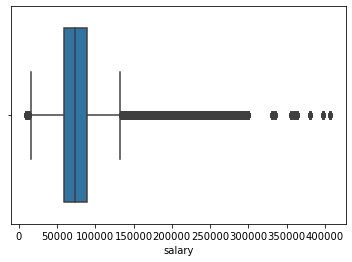

In [66]:
sns.boxplot(x = 'salary', data = df_final);

Vemos que sí hay valores atípicos 

In [67]:
df_final_copy = df_final.copy()

In [68]:
# Empezaremos por el IterativeImputer
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_final_copy[["salary"]])

imputer_iterative_imputado

array([[92552.        ],
       [79371.73290216],
       [79371.73290216],
       ...,
       [47670.        ],
       [79371.73290216],
       [46594.        ]])

In [69]:
df_final_copy['salary_imputado'] = imputer_iterative_imputado


In [70]:
# Y, ahora comprobamos los nulos
df_final_copy['salary_imputado'].isnull().sum()

0

In [ ]:
# Y, ahora, vamos hacer lo mismo, pero con el KNNImputer.

# Crear una instancia del KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)

# Imputar los valores nulos utilizando el KNNImputer
imputer_knn_imputado = imputer_knn.fit_transform(df_final_copy[['salary']])

# Comprobamos los valores que nos devuelve
imputer_knn_imputado

In [67]:
df_final_copy[["salary_knn"]] = imputer_knn_imputado

In [68]:
# Y, ahora comprobamos los nulos
df_final_copy["salary_knn"].isnull().sum()

0

Vemos que ambos métodos nos devuelven los mismos resultados

In [ ]:
# Esto nos puede ayudar a evaluar cómo cambian los datos después de la imputación.
df_final_copy.describe()[["salary", "salary_imputado","salary_knn"]]

Viendo los resultados de los estadísticos vemos que ambos métodos nos proporcionan resultados muy muy similares, por lo tanto sería correcto elegir cualquiera de los dos. Sin embargo, en este caso escogeremos el método de IterativeImputer, ya que el KNNImputer tarda mucho.

Ahora tenemos que eliminar las columnas que ya no son necesarias ('salary', 'salary_knn')

In [ ]:
# Eliminar columnas adicionales creadas para imputación iterativa y knn
df_final_copy.drop(['salary', 'salary_knn'], axis=1, inplace=True)

In [ ]:
# Ahora cambio el nombre de la columna para que tenga la original
df_final_copy.rename(columns={'salary_imputado': 'salary'}, inplace=True)

In [86]:
df_final_copy.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'province', 'city', 'postal_code', 'gender', 'education', 'salary',
       'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [87]:
# Los valores de la columna tienen muchos decimales. Vamos a redondearlos
df_final_copy['salary'] = df_final_copy['salary'].round(2)

In [88]:
df_final_copy

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,January,3,0,3,1521,152,0,0.0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,August,Unknown,Unknown
1,100102,2017,January,10,4,14,2030,203,0,0.0,Ontario,Toronto,M1R 4K3,Male,College,79371.73,Single,Nova,2887.74,Standard,2013,March,Unknown,Unknown
2,100140,2017,January,6,0,6,1200,120,0,0.0,British Columbia,Dawson Creek,U5I 4F1,Female,College,79371.73,Divorced,Nova,2838.07,Standard,2016,July,Unknown,Unknown
3,100214,2017,January,0,0,0,0,0,0,0.0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.00,Married,Star,4170.57,Standard,2015,August,Unknown,Unknown
4,100272,2017,January,0,0,0,0,0,0,0.0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.00,Divorced,Star,6622.05,Standard,2014,January,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,December,0,0,0,0,0,0,0.0,Ontario,Toronto,M1R 4K3,Male,College,79371.73,Married,Aurora,7290.07,Standard,2014,May,Unknown,Unknown
403756,999911,2018,December,0,0,0,0,0,0,0.0,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.00,Single,Nova,8564.77,Standard,2012,August,Unknown,Unknown
403757,999940,2018,December,3,0,3,1233,123,0,0.0,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.00,Married,Nova,20266.50,Standard,2017,July,Unknown,Unknown
403758,999982,2018,December,0,0,0,0,0,0,0.0,British Columbia,Victoria,V10 6T5,Male,College,79371.73,Married,Star,2631.56,Standard,2018,July,Unknown,Unknown


Ahora nuestro dataframe tiene datos limpios y homogéneos.

In [89]:
df_final_copy.to_csv('Flights.csv', index=False)